# Exploratory Data Analysis (EDA) on Economic Indicator
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

##1. Installation Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index6')

Mounted at /content/drive


In [3]:
df = pd.read_csv('UMCSENT.csv', index_col='DATE', parse_dates=True)
df = df.loc['1978-01-01':'2023-01-01']
df.UMCSENT = pd.to_numeric(df.UMCSENT)
df.head()

,UMCSENT
DATE,
1978-01-01,83.7
1978-02-01,84.3
1978-03-01,78.8
1978-04-01,81.6
1978-05-01,82.9


## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

In [4]:
 # Min-max Normalization 
min_vals = np.min(df['UMCSENT'])
max_vals = np.max(df['UMCSENT'])
normalized_data = (df['UMCSENT'] - min_vals) / (max_vals - min_vals)
df['UMCSENT_normalized'] = normalized_data


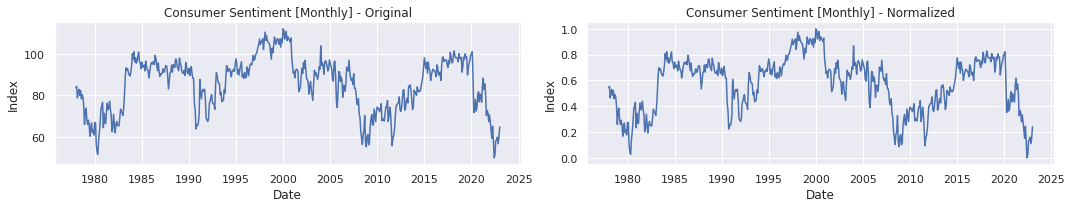

In [5]:
#Plot 
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)

plt.subplot(121)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("Consumer Sentiment [Monthly] - Original")
plt.plot(df.index, df['UMCSENT'])

plt.subplot(122)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("Consumer Sentiment [Monthly] - Normalized")
plt.plot(df.index, df['UMCSENT_normalized'])

plt.tight_layout()






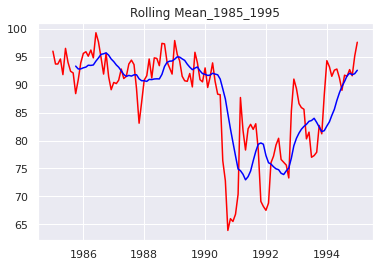

In [16]:
# Moving Average (MA)
df_1985_1995 = df.loc['1985-01-01':'1995-01-01']
df_1985_1995.head()

#df_1985_1995.DATE = pd.to_datetime(df_1985_1995.DATE)
#df_1985_1995.UMCSENT = pd.to_numeric(df_1985_1995.UMCSENT)
#x = df_1985_1995['DATE']
#y = df_1985_1995['UMCSENT']

UMCSENT_mean = df_1985_1995['UMCSENT'].rolling(10, win_type = None).mean()
ori_85 = plt.plot(df_1985_1995.index, df_1985_1995['UMCSENT'], color = 'red', label = 'Original')
MA_85 = plt.plot(df_1985_1995.index, UMCSENT_mean, color = 'blue', label = 'MA')
plt.title('Rolling Mean_1985_1995')
plt.show(block=False)

**Lag Plot**

A lag plot, also known as a scatter plot of a time series against a lagged version of itself, is a graphical tool used in time series analysis to visually assess whether a time series is random or not.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

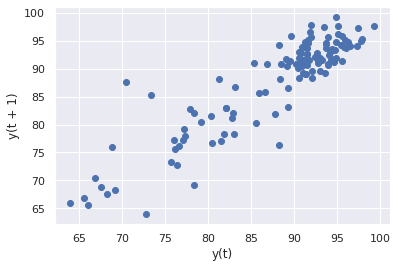

In [7]:
#Lag_plot

from pandas.plotting import lag_plot
lag_plot(df_1985_1995['UMCSENT'])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

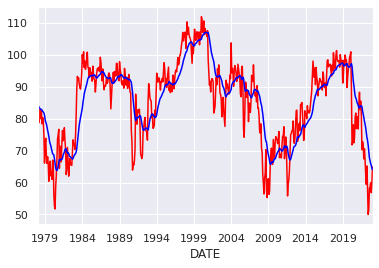

In [8]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(df['UMCSENT']).fit(smoothing_level=.1,optimized=False)
#model = SimpleExpSmoothing(df['UMCSENT']).fit(optimized=True)
df['UMCSENT'].plot(color = 'red')
model.fittedvalues.plot(color = 'blue')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

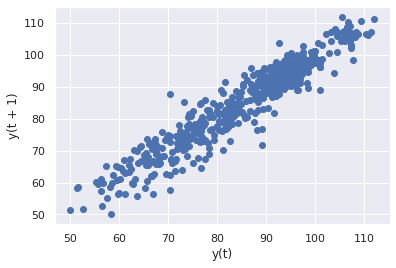

In [9]:
#Lag_plot
from pandas.plotting import lag_plot
lag_plot(df['UMCSENT'])

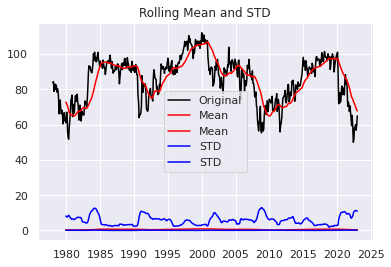

In [25]:
#Moving Average
rolmeans = df.rolling(window=24).mean()
rolstd = df.rolling(window=24).std()
original = plt.plot(df['UMCSENT'], color = 'black', label = 'Original')
mean = plt.plot(rolmeans, color = 'red',label = 'Mean')
std = plt.plot(rolstd, color = 'blue', label = 'STD')
plt.legend(loc='best')
plt.title('Rolling Mean and STD')
plt.show(block=False)

# Accroding to the result, the data is not stationary due to non-constant mean

In [24]:
#Null-hypo = Stationary
from statsmodels.tsa.stattools import adfuller
X = df['UMCSENT'].values
result = adfuller(X)
print('ADF Statistic: %f' %result[0])
print('p-values: %f'% result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

# Since ADF Stat is larger than 5% critical values, reject the null hypothesis
# Conclusion: Time-series is non-stationary

ADF Statistic: -2.269057
p-values: 0.182142
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


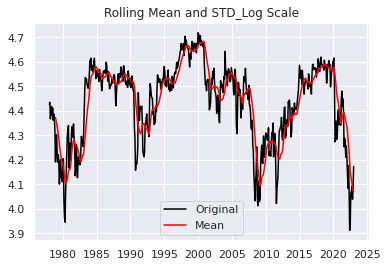

,UMCSENT,UMCSENT_normalized
DATE,,
1978-01-01,83.7,0.543548
1978-02-01,84.3,0.553226
1978-03-01,78.8,0.464516
1978-04-01,81.6,0.509677
1978-05-01,82.9,0.530645


In [11]:
#Estimating Trend
UMCSENT_log = np.log(df['UMCSENT']) 

rolmean_log = UMCSENT_log.rolling(window=12).mean()
rolstd_log = UMCSENT_log.rolling(window=12).std()
original_log = plt.plot(UMCSENT_log, color = 'black', label = 'Original')
mean_log = plt.plot(rolmean_log, color = 'red', label = 'Mean')
#std_log = plt.plot(rolstd_log, color = 'blue', label = 'STD')
plt.legend(loc='best')
plt.title('Rolling Mean and STD_Log Scale')
plt.show(block=False)
UMCSENT_log.head()
df.head()

<ipython-input-32-11158f2779ff>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(411)


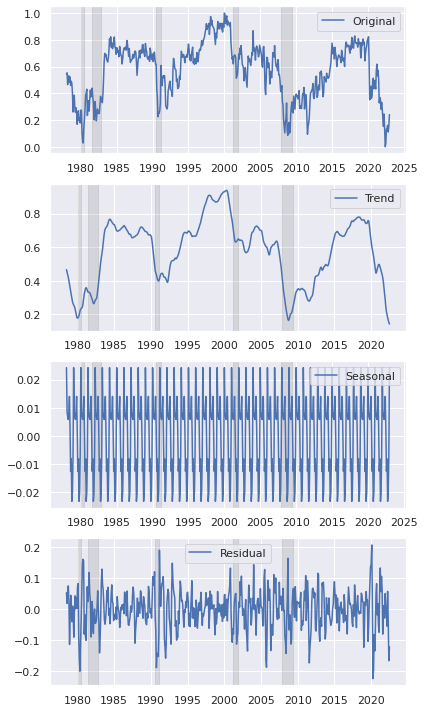

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['UMCSENT_normalized'], model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(10)


recession_periods = [('1980-01-01', '1980-07-01'), ('1981-07-01', '1982-11-01'), ('1990-07-01', '1991-03-01'),
                     ('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01')]


# display the chart
plt.xlabel("Time")


plt.subplot(411)
plt.plot(df['UMCSENT_normalized'], label = 'Original')
plt.legend(loc = 'best')

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')


for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)
plt.tight_layout()





(array([  5.,  10.,  24.,  62., 121., 156., 103.,  34.,  11.,   3.]),
 array([-0.2239095 , -0.18077045, -0.1376314 , -0.09449234, -0.05135329,
        -0.00821424,  0.03492481,  0.07806386,  0.12120291,  0.16434197,
         0.20748102]),
 <BarContainer object of 10 artists>)

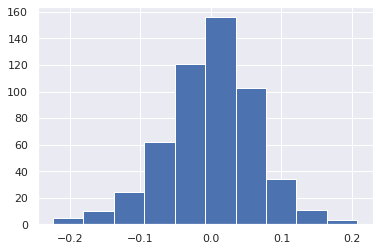

In [29]:
plt.hist(residual)